# EDA

## TODO

* Write something to fetch data from the website
* Write something to read in the data and split into a train and test set.

## Imports

In [4]:
from collections import Counter
import os
import email
import email.policy

import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
DOWNLOAD_ROOT = "http://spamassassin.apache.org/old/publiccorpus/"
HAM_URL = DOWNLOAD_ROOT + "20030228_easy_ham.tar.bz2"
SPAM_URL = DOWNLOAD_ROOT + "20030228_spam.tar.bz2"
SPAM_PATH = os.path.join("data", "spam")
HAM_DIR = os.path.join(SPAM_PATH, "easy_ham")
SPAM_DIR = os.path.join(SPAM_PATH, "spam")
RANDOM_STATE = 42

In [6]:
ham_filenames = [name for name in os.listdir(HAM_DIR)]

In [7]:
len(ham_filenames)

2500

In [8]:
spam_filenames = [name for name in os.listdir(SPAM_DIR)]

In [9]:
len(spam_filenames)

500

In [10]:
def load_email(is_spam, filename, spam_path=SPAM_PATH):
    directory = "spam" if is_spam else "easy_ham"
    
    with open(os.path.join(spam_path, directory, filename), "rb") as f:
        return email.parser.BytesParser(policy=email.policy.default).parse(f)

In [11]:
ham_emails = [load_email(is_spam=False, filename=name) for name in ham_filenames]

In [12]:
print(ham_emails[1].get_content().strip())

Martin A posted:
Tassos Papadopoulos, the Greek sculptor behind the plan, judged that the
 limestone of Mount Kerdylio, 70 miles east of Salonika and not far from the
 Mount Athos monastic community, was ideal for the patriotic sculpture. 
 
 As well as Alexander's granite features, 240 ft high and 170 ft wide, a
 museum, a restored amphitheatre and car park for admiring crowds are
planned
---------------------
So is this mountain limestone or granite?
If it's limestone, it'll weather pretty fast.

------------------------ Yahoo! Groups Sponsor ---------------------~-->
4 DVDs Free +s&p Join Now
http://us.click.yahoo.com/pt6YBB/NXiEAA/mG3HAA/7gSolB/TM
---------------------------------------------------------------------~->

To unsubscribe from this group, send an email to:
forteana-unsubscribe@egroups.com

 

Your use of Yahoo! Groups is subject to http://docs.yahoo.com/info/terms/


In [13]:
spam_emails = [load_email(is_spam=True, filename=name) for name in spam_filenames]

In [14]:
print(spam_emails[6].get_content().strip())

Help wanted.  We are a 14 year old fortune 500 company, that is
growing at a tremendous rate.  We are looking for individuals who
want to work from home.

This is an opportunity to make an excellent income.  No experience
is required.  We will train you.

So if you are looking to be employed from home with a career that has
vast opportunities, then go:

http://www.basetel.com/wealthnow

We are looking for energetic and self motivated people.  If that is you
than click on the link and fill out the form, and one of our
employement specialist will contact you.

To be removed from our link simple go to:

http://www.basetel.com/remove.html


4139vOLW7-758DoDY1425FRhM1-764SMFc8513fCsLl40


## Create train / test sets

In [15]:
X = np.array(ham_emails + spam_emails, dtype=object)

In [16]:
y = np.array([0] * len(ham_emails) + [1] * len(spam_emails))

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

## Analyse train set

* Subject is probably important
* capital letters:small letters ratio is probably import
* email length is probably important
* email type is probably important
* word content is probably important
* Attachments could be important

In [18]:
def get_email_structure(email):
    if isinstance(email, str):
        return email

    payload = email.get_payload()
    
    if isinstance(payload, list):
        return "multipart({})".format(", ".join([
            get_email_structure(sub_email)
            for sub_email in payload
        ]))
    else:
        return email.get_content_type()

In [19]:
def structures_counter(emails):
    structures = Counter()
    for email in emails:
        structure = get_email_structure(email)
        structures[structure] += 1
    return structures

In [20]:
train_ham_emails = X_train[y_train == 0]
train_spam_emails = X_train[y_train == 1]

### Investigate email type

In [21]:
ham_counter = structures_counter(train_ham_emails)

In [22]:
spam_counter = structures_counter(train_spam_emails)

In [23]:
def plot_content_bar_chart(counter):
    keys = counter.keys()
    y_pos = np.arange(len(keys))

    performance = [counter[k] for k in keys]

    plt.barh(y_pos, performance, align='center', alpha=0.4)
    plt.yticks(y_pos, keys)
    plt.xlabel('Counts per key')
    plt.title('How fast do you want to go today?')

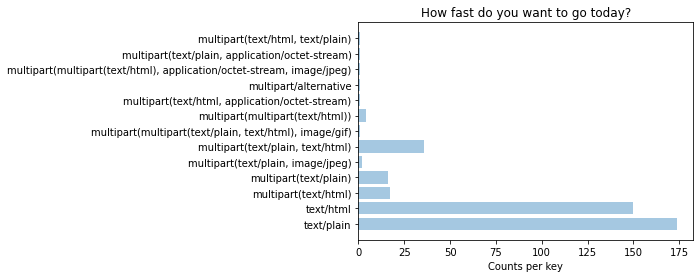

In [24]:
plot_content_bar_chart(spam_counter)

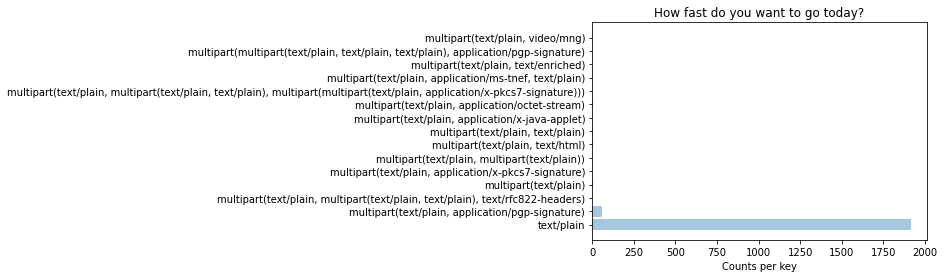

In [25]:
plot_content_bar_chart(ham_counter)

Spam emails have a much more varied content type, especially html.  Ham emails seem to be mainly plain text and some are multipart(text/plain, application/pgp-signiture).

### Check email subjects

In [26]:
train_ham_emails[0].keys()

['Return-Path',
 'Delivered-To',
 'Received',
 'Received',
 'Received',
 'Received',
 'Delivered-To',
 'Received',
 'Received',
 'To',
 'Subject',
 'Message-Id',
 'From',
 'Sender',
 'Errors-To',
 'X-Beenthere',
 'X-Mailman-Version',
 'Precedence',
 'List-Help',
 'List-Post',
 'List-Subscribe',
 'List-Id',
 'List-Unsubscribe',
 'List-Archive',
 'Date']

In [52]:
for k, v in train_ham_emails[0].items():
    print(f"{k}:\n{v}\n")

Return-Path:
<fork-admin@xent.com>

Delivered-To:
yyyy@localhost.spamassassin.taint.org

Received:
from localhost (jalapeno [127.0.0.1])	by jmason.org (Postfix) with ESMTP id DEA8516F03	for <jm@localhost>; Thu, 19 Sep 2002 13:26:35 +0100 (IST)

Received:
from jalapeno [127.0.0.1]	by localhost with IMAP (fetchmail-5.9.0)	for jm@localhost (single-drop); Thu, 19 Sep 2002 13:26:35 +0100 (IST)

Received:
from xent.com ([64.161.22.236]) by dogma.slashnull.org    (8.11.6/8.11.6) with ESMTP id g8JCFfC18989 for <jm@jmason.org>;    Thu, 19 Sep 2002 13:15:42 +0100

Received:
from lair.xent.com (localhost [127.0.0.1]) by xent.com (Postfix)    with ESMTP id B101E294108; Thu, 19 Sep 2002 05:12:05 -0700 (PDT)

Delivered-To:
fork@spamassassin.taint.org

Received:
from argote.ch (argote.ch [80.65.224.17]) by xent.com (Postfix)    with ESMTP id 19FF329409E for <fork@xent.com>; Thu, 19 Sep 2002 05:11:32    -0700 (PDT)

Received:
by argote.ch (Postfix, from userid 500) id CA1F9C44D;    Thu, 19 Sep 2002 14

In [27]:
train_ham_emails[0]["Subject"]

"Re: Hanson's Sept 11 message in the National Review"

In [28]:
train_spam_emails[20]["Subject"]

'[ILUG-Social] HELLO'

In [29]:
from wordcloud import WordCloud, STOPWORDS

In [44]:
stopwords = set(STOPWORDS)
# Included by default in a lot of email subjects so we remove it
stopwords.update(["Re"])

In [45]:
ham_subjects = [email["Subject"] for email in train_ham_emails]
spam_subjects = [email["Subject"] for email in train_spam_emails]

In [46]:
wc_ham = WordCloud(stopwords=stopwords, background_color="white").generate(" ".join(ham_subjects))

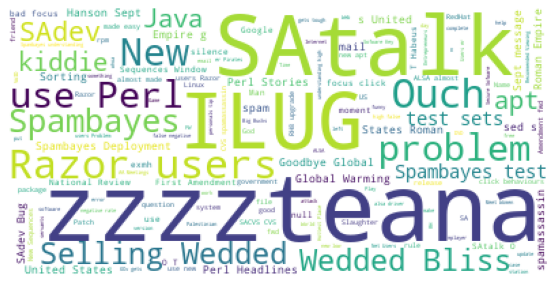

In [47]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["figure.figsize"] = (10,5)
plt.imshow(wc_ham)
plt.axis("off")
plt.show()

In [48]:
wc_spam = WordCloud(stopwords=stopwords, background_color="white").generate(" ".join(spam_subjects))

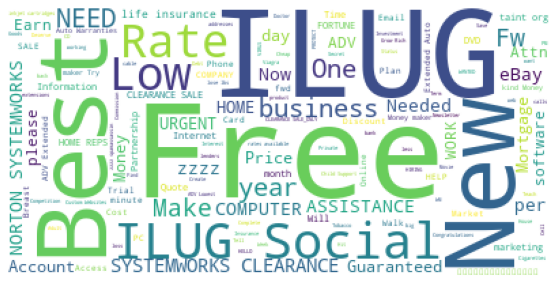

In [49]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["figure.figsize"] = (10,5)
plt.imshow(wc_spam)
plt.axis("off")
plt.show()

Looks like subject is important.  Spam emails focus a lot on opportunisitc words like Free, Best etc. They seem less diverse overall.  Ham emails have a more even distribution of words in Subject.

### Extracting features from text

In [53]:
from sklearn.feature_extraction.text import CountVectorizer

In [54]:
count_vect = CountVectorizer()

In [108]:
from bs4 import BeautifulSoup

In [109]:
def email_to_text(email):
    html = None
    for part in email.walk():
        ctype = part.get_content_type()
        #TODO: Can we make this better with get_body()?
        if not ctype in ("text/plain", "text/html"):
            continue
        try:
            content = part.get_content()
        except: # in case of encoding issues
            content = str(part.get_payload())
        if ctype == "text/plain":
            return content
        else:
            html = content
    if html:
        return BeautifulSoup(html, "html.parser").get_text()

In [113]:
html_spam_emails = [email for email in X_train[y_train==1]
                    if get_email_structure(email) == "text/html"]
sample_html_spam = html_spam_emails[7]
print(sample_html_spam.get_content().strip()[:-1], "...")

<HTML><HEAD><TITLE></TITLE><META http-equiv="Content-Type" content="text/html; charset=windows-1252"><STYLE>A:link {TEX-DECORATION: none}A:active {TEXT-DECORATION: none}A:visited {TEXT-DECORATION: none}A:hover {COLOR: #0033ff; TEXT-DECORATION: underline}</STYLE><META content="MSHTML 6.00.2713.1100" name="GENERATOR"></HEAD>
<BODY text="#000000" vLink="#0033ff" link="#0033ff" bgColor="#CCCC99"><TABLE borderColor="#660000" cellSpacing="0" cellPadding="0" border="0" width="100%"><TR><TD bgColor="#CCCC99" valign="top" colspan="2" height="27">
<font size="6" face="Arial, Helvetica, sans-serif" color="#660000">
<b>OTC</b></font></TD></TR><TR><TD height="2" bgcolor="#6a694f">
<font size="5" face="Times New Roman, Times, serif" color="#FFFFFF">
<b>&nbsp;Newsletter</b></font></TD><TD height="2" bgcolor="#6a694f"><div align="right"><font color="#FFFFFF">
<b>Discover Tomorrow's Winners&nbsp;</b></font></div></TD></TR><TR><TD height="25" colspan="2" bgcolor="#CCCC99"><table width="100%" border="0" 

In [115]:
print(email_to_text(sample_html_spam)[:-1], "...")




OTC

 Newsletter
Discover Tomorrow's Winners 

For Immediate Release

Cal-Bay (Stock Symbol: CBYI)
Watch for analyst "Strong Buy Recommendations" and several advisory newsletters picking CBYI.  CBYI has filed to be traded on the OTCBB, share prices historically INCREASE when companies get listed on this larger trading exchange. CBYI is trading around 25 cents and should skyrocket to $2.66 - $3.25 a share in the near future.
Put CBYI on your watch list, acquire a position TODAY.

REASONS TO INVEST IN CBYI

A profitable company and is on track to beat ALL earnings estimates!

One of the FASTEST growing distributors in environmental & safety equipment instruments.

Excellent management team, several EXCLUSIVE contracts.  IMPRESSIVE client list including the U.S. Air Force, Anheuser-Busch, Chevron Refining and Mitsubishi Heavy Industries, GE-Energy & Environmental Research.

RAPIDLY GROWING INDUSTRY
Industry revenues exceed $900 million, estimates indicate that there could be as much as

In [121]:
import urlextract

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class EmailToWordCounterTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, strip_headers=True, lower_case=True, remove_punctuation=True,
                 replace_urls=True, replace_numbers=True, stemming=True):
        self.strip_headers = strip_headers
        self.lower_case = lower_case
        self.remove_punctuation = remove_punctuation
        self.replace_urls = replace_urls
        self.replace_numbers = replace_numbers
        self.stemming = stemming
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X_transformed = []
        for email in X:
            text = email_to_text(email) or "" # if there is a problem we just make it empty string
            if self.lower_case:
                text = text.lower()
            if self.replace_urls and url_extractor is not None:
                urls = list(set(url_extractor.find_urls(text)))
                urls.sort(key=lambda url: len(url), reverse=True)
                for url in urls:
                    text = text.replace(url, " URL ")
            if self.replace_numbers:
                text = re.sub(r'\d+(?:\.\d*)?(?:[eE][+-]?\d+)?', 'NUMBER', text)
            if self.remove_punctuation:
                text = re.sub(r'\W+', ' ', text, flags=re.M)
            word_counts = Counter(text.split())
            if self.stemming and stemmer is not None:
                stemmed_word_counts = Counter()
                for word, count in word_counts.items():
                    stemmed_word = stemmer.stem(word)
                    stemmed_word_counts[stemmed_word] += count
                word_counts = stemmed_word_counts
            X_transformed.append(word_counts)
        return np.array(X_transformed)

In [119]:
BeautifulSoup('<a href="http://www.google.com">http://www.google.com</a>', "html.parser").find_all("a").extract()

AttributeError: ResultSet object has no attribute 'extract'. You're probably treating a list of elements like a single element. Did you call find_all() when you meant to call find()?